# Percentage of Scores Based on the number of Study Hours

In this regression task we need to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import requests

In [2]:
# Accessing the dataset and storing it in a pandas dataframe

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape #25 rows and 2 columns

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.isna().sum() #checking for null values

Hours     0
Scores    0
dtype: int64

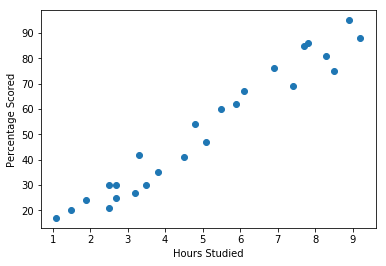

In [12]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

There is a positive linear relation between the no. of hours studied and the score obtained

# Data Preparation

In [13]:
x=df.drop('Scores',axis=1)
y=df.Scores

In [14]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [16]:
x.shape

(25, 1)

In [17]:
y.shape

(25,)

In [19]:
#Splitting our data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50,shuffle=True)

In [21]:
x_train.shape,x_test.shape

((20, 1), (5, 1))

# Model Training

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
regressor.score(x_test,y_test)

0.9710141413299419

# To obtain best fitting

In [24]:
regressor.intercept_

2.8102364628265804

In [25]:
regressor.coef_

array([9.59563563])

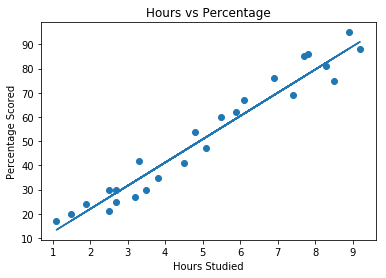

In [27]:
Y=regressor.coef_*x+regressor.intercept_ #equation of straight line,y=mx+c,m=slope,c=intercept
plt.scatter(x,y)
plt.plot(x,Y)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Percentage');


# Predictions

In [28]:
y_pred=regressor.predict(x_test)
y_pred


array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [29]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #comparing the actual scores and the predicted scores

,Actual,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


# Model Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
print('Mean Absolute Error=',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error=',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score=',r2_score(y_test,y_pred))

Mean Absolute Error= 4.5916495300630285
Mean Squared Error= 25.58407829653998
Root Mean Squared Error= 5.0580706100785084
R2 Score= 0.971014141329942


# What will be the predicted score, if a student study for 9.25 hours in a day?

In [32]:
print('Hours Studied=',9.25)
print('Predicted Score=',regressor.predict([[9.25]])[0])

Hours Studied= 9.25
Predicted Score= 91.56986604454477


# If a student study for 9.25 hours in a day, he/she can score 91.56 % score